<a href="https://colab.research.google.com/github/Tashika-Wijesooriya/hughghghghg/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Conv3D,
    MaxPooling3D,
    GlobalAveragePooling3D,
    Dense,
    Dropout
)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/echo


 3dcnn_echo_model.h5   3dcnn_echo_model.keras   MeasurementsList.csv  'set 1'


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/echo/MeasurementsList.csv")
df.head()


,Unnamed: 0,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,1,0X66EFA90ADBC0BA4F,IVSd,0.838136,94,634,659,314,286,198,19.970,1024.0,768,train
1,2,0X66EFA90ADBC0BA4F,LVPWd,0.828865,94,512,529,571,538,198,19.970,1024.0,768,train
2,3,0X66EFA90ADBC0BA4F,LVIDd,5.453681,94,530,634,535,314,198,19.970,1024.0,768,train
3,4,0XAD41A03F4A5B9ABC,LVPWd,0.761081,101,465,491,524,498,202,19.965,1024.0,768,train
4,5,0XAD41A03F4A5B9ABC,LVIDs,2.721935,119,495,578,451,349,202,19.965,1024.0,768,train


In [5]:
print(df.columns)


Index(['Unnamed: 0', 'HashedFileName', 'Calc', 'CalcValue', 'Frame', 'X1',
       'X2', 'Y1', 'Y2', 'Frames', 'FPS', 'Width', 'Height', 'split'],
      dtype='object')


In [6]:
df.head(5)


,Unnamed: 0,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,1,0X66EFA90ADBC0BA4F,IVSd,0.838136,94,634,659,314,286,198,19.970,1024.0,768,train
1,2,0X66EFA90ADBC0BA4F,LVPWd,0.828865,94,512,529,571,538,198,19.970,1024.0,768,train
2,3,0X66EFA90ADBC0BA4F,LVIDd,5.453681,94,530,634,535,314,198,19.970,1024.0,768,train
3,4,0XAD41A03F4A5B9ABC,LVPWd,0.761081,101,465,491,524,498,202,19.965,1024.0,768,train
4,5,0XAD41A03F4A5B9ABC,LVIDs,2.721935,119,495,578,451,349,202,19.965,1024.0,768,train


In [7]:
import os

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"
os.listdir(VIDEO_PATH)[:5]


['0X1B8589D593AC58A0.avi',
 '0X2B72AD603E0883D9.avi',
 '0X2D97C81451AF8866.avi',
 '0X1B16F4EB2082096D.avi',
 '0X2D089AD69D8310F3.avi']

In [8]:
df["HashedFileName"].iloc[0]


'0X66EFA90ADBC0BA4F'

In [9]:
df[df["HashedFileName"] == df["HashedFileName"].iloc[0]]


,Unnamed: 0,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,1,0X66EFA90ADBC0BA4F,IVSd,0.838136,94,634,659,314,286,198,19.97,1024.0,768,train
1,2,0X66EFA90ADBC0BA4F,LVPWd,0.828865,94,512,529,571,538,198,19.97,1024.0,768,train
2,3,0X66EFA90ADBC0BA4F,LVIDd,5.453681,94,530,634,535,314,198,19.97,1024.0,768,train


In [10]:
df_lvh = df[df["Calc"].isin(["IVSd", "LVPWd"])]

labels = (
    df_lvh
    .groupby("HashedFileName")["CalcValue"]
    .max()
    .reset_index()
)

labels["label"] = (labels["CalcValue"] >= 1.1).astype(int)
labels.head()


,HashedFileName,CalcValue,label
0,0X100EC1C77A847AA7,1.616694,1
1,0X1015CA08CEBF3730,1.269556,1
2,0X1017398D3C3F5FF9,1.471461,1
3,0X10207E7A278639F3,0.818880,0
4,0X1023A55040C84F27,1.167655,1


In [11]:
import os

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"

video_name = os.listdir(VIDEO_PATH)[0]
video_name


'0X1B8589D593AC58A0.avi'

In [12]:
video_id = video_name.replace(".avi", "")

label = labels[labels["HashedFileName"] == video_id]["label"].values[0]
print("Video:", video_name)
print("Label:", label)


Video: 0X1B8589D593AC58A0.avi
Label: 0


In [13]:
import cv2
import matplotlib.pyplot as plt
import os

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"

video_name = os.listdir(VIDEO_PATH)[0]
video_path = os.path.join(VIDEO_PATH, video_name)

cap = cv2.VideoCapture(video_path)

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

print("Total frames:", len(frames))


Total frames: 126


(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

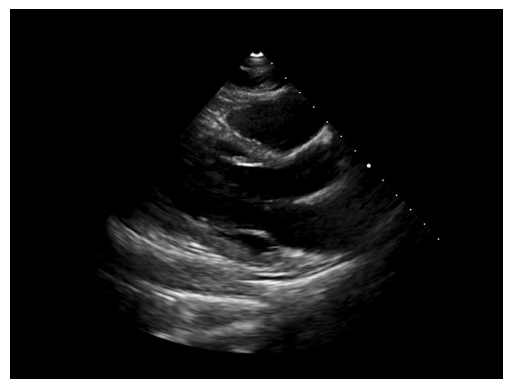

In [14]:
plt.imshow(frames[0][:,:,::-1])
plt.axis("off")


In [15]:
import cv2
import numpy as np

IMG_SIZE = 112      # image height & width
MAX_FRAMES = 16     # number of frames per video

def load_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while len(frames) < MAX_FRAMES:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
        frame = frame / 255.0   # normalize (0–1)
        frames.append(frame)

    cap.release()

    # if video has less frames, repeat last frame
    while len(frames) < MAX_FRAMES:
        frames.append(frames[-1])

    return np.array(frames)


In [16]:
video_tensor = load_video(video_path)

print(video_tensor.shape)


(16, 112, 112, 3)


In [17]:
import os
import numpy as np

X = []
y = []

VIDEO_PATH = "/content/drive/MyDrive/echo/set 1"

for video_file in os.listdir(VIDEO_PATH):
    if not video_file.endswith(".avi"):
        continue

    video_path = os.path.join(VIDEO_PATH, video_file)
    video_id = video_file.replace(".avi", "")

    # get label
    label_row = labels[labels["HashedFileName"] == video_id]

    if len(label_row) == 0:
        continue  # skip if no label

    label = label_row["label"].values[0]

    # load video
    video_data = load_video(video_path)

    X.append(video_data)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (561, 16, 112, 112, 3)
y shape: (561,)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


In [19]:
model = Sequential([
    Input(shape=(16, 112, 112, 1)),

    Conv3D(32, (3,3,3), activation="relu"),
    MaxPooling3D((2,2,2)),

    Conv3D(64, (3,3,3), activation="relu"),
    MaxPooling3D((2,2,2)),

    GlobalAveragePooling3D(),

    Dense(64, activation="relu"),
    Dropout(0.5),

    Dense(1, activation="sigmoid")
])


In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 14, 110, 110,   │           896 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 7, 55, 55, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 5, 53, 53, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 2, 26, 26, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,481 (236.25 KB)

 Trainable params: 60,481 (236.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train samples:", X_train.shape[0])
print("Val samples:", X_val.shape[0])


Train samples: 448
Val samples: 113


In [23]:
print("X shape:", X.shape)
print("X_train shape:", X_train.shape)


X shape: (561, 16, 112, 112, 3)
X_train shape: (448, 16, 112, 112, 3)


In [25]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define the callback
early_stop = EarlyStopping(
    monitor='val_loss',        # Watch the validation loss
    patience=3,                # Stop if it doesn't improve for 3 epochs
    restore_best_weights=True, # Revert to the best model weights at the end
    mode='min'                 # We want loss to be minimum
)

In [26]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=2,
    callbacks=[early_stop] # Now this variable exists
)

Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv3d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (2, 16, 112, 112, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(2, 16, 112, 112, 3), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)


In [ ]:
model.save("/content/drive/MyDrive/echo/3dcnn_echo_model.keras")


In [ ]:
import numpy as np

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Normal", "LVH"])
disp.plot(cmap="Blues")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_val, y_pred,
    target_names=["Normal", "LVH"]
))


In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
